# **Laboratorio 4: Regresión multivariada**

Estudiante: Alejandra Arciniegas Marin, C.C 1000662159

<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_04_reg_multivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [22]:
#@title Importar librerías

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rd
import plotly.graph_objects as go
import pandas as pd

1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano.

- Realizar un diagrama 3D de los puntos generados aleatoriamente.

In [23]:
#@title Generar números aleatorios pertenecientes al plano

#Genero 100 puntos aleatorios. Para ellos genero 100 coordenadas x1, 100 coordenadas x2 y las ingreso en la ecuación del plano
N = 100
x_1 = 2*rd.rand(N) - 1
x_2 = 2*rd.rand(N) - 1

y = 2.1*x_1 - 3.1*x_2


In [24]:
#@title Definir el plano teórico para representarlo en el gráfico

x1= np.linspace(-1, 1, N)
x2= np.linspace(-1, 1, N)
X_1,X_2 =np.meshgrid(x1, x2)
Y = 2.1*X_1 - 3.1*X_2

In [25]:
fig = go.Figure(go.Surface(x=X_1, y=X_2, z=Y))
fig.update_layout(scene = dict(xaxis_title='x1', yaxis_title='x2', zaxis_title='y'), title = 'Puntos aleatorios en el plano')
fig.add_trace(go.Scatter3d(x=x_1, y=x_2, z= y, mode='markers', marker=dict(size=4, color='white')))
fig.show()

In [26]:
#@title Definir un Dataframe con las coordenadas de los puntos generados aleatoriamente y con una columna de unos para crear mis arreglos de X y Y
df = pd.DataFrame({"x1":x_1, "x2":x_2, "y":y})
df["ones"]=1
df

,x1,x2,y,ones
0,-0.817328,-0.053591,-1.550256,1
1,-0.629778,0.741227,-3.620339,1
2,-0.013003,0.991983,-3.102453,1
3,-0.022272,0.835745,-2.637581,1
4,-0.627830,-0.898959,1.468328,1
...,...,...,...,...
95,0.176833,0.455711,-1.041355,1
96,-0.064869,0.168211,-0.657680,1
97,0.325570,0.566502,-1.072458,1
98,-0.979288,0.988413,-5.120585,1


2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.

In [27]:
#@title Encontrar las cantidades N (Número de Variables a encontrar, 3 en este caso para theta1, theta2 y el 'intercepto' theta0) y m (Número de datos de entrenamiento, en este caso 100)
Nfeatures = 3
m = len(df['x1'])

#Inicializar los valores iniciales de theta de forma aleatoria y cuadrar su dimensión para que sea un vector de 3 filas y una columna
theta = rd.random(Nfeatures).reshape(Nfeatures, 1)
theta #Theta inicial

array([[0.39531834],
       [0.51166738],
       [0.49109395]])

3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.

In [28]:
#@title Definir la matriz X con la primera fila de 1, la segunda fila con los 100 valores de x1 y la tercera con los 100 valores de x2, y el vector Y con 1 fila y 100 columnas
X = df[["ones", "x1", "x2"]].values.T
Y = df.y.values.reshape(1, N)

X.shape, Y.shape

((3, 100), (1, 100))

In [29]:
#@title Definir la tasa de aprendizaje y el número de iteraciones que usaremos más adelante en el gradiente descendente
alfa = 0.01
Niter = 100

4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):

  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $

In [30]:
#@title Definir el vector h y verificar que contenga la misma forma que Y, es decir 1 fila y 100 columnas
h = (theta.T@X)
h.shape

(1, 100)

In [31]:
#@title Definir el vector lambda y verificar que contenga la misma forma que Y y h, es decir 1 fila y 100 columnas
Lam = h - Y
Lam.shape

(1, 100)

In [32]:
#@title Definir el vector de lambda al cuadrado
Lam_2 = Lam**2
Lam_2.shape

(1, 100)

In [33]:
#@title Calcular la función de coste para los valores iniciales de theta a partir del vector lambda cuadrado definido arriba
J = 0.5*np.mean(Lam_2)
J

2.6194356440402196

5. Aplicar el gradiente descendente:
  - Encontrar el gradiente.
  $\nabla J = \Lambda X.T $
  
  - Actualizar los nuevos parametros:
  $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$

In [34]:
#@title Sacar el gradiente y dejarlo como un vector columna (Para sacar el gradiente no utilizamos @ sino el producto punto porque el @ arroja errores)
grad_J = np.dot(Lam, X.T).T
grad_J.shape

(3, 1)

In [35]:
#@title Actualizar los parámetros theta
theta = theta - alfa*grad_J
theta

array([[ 0.21627887],
       [ 1.04622206],
       [-0.71161561]])


6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano.

In [36]:
#@title Definir funciones con lo que utilizamos arriba, para optimizar la ejecución del ciclo
def H(theta, X):
  return theta.T@X

def Lambda(h,Y):
  return h - Y

def costo(Lam):#Función de costo
  J = Lam**2
  return 0.5*J.mean()

def gradiente_descendente(theta, Lam, alfa): #Algoritmo de gradiente descendente y actualización de parámetros
  grad = np.dot(Lam, X.T).T
  theta = theta - alfa*grad
  return theta

In [37]:
#@title Hacer 100 iteraciones para actualizar los parámetros theta y guardar además la función de costo en cada iteración para graficarla luego y ver si en efecto, disminuye con cada iteración como es de esperarse
J = np.zeros(Niter)

for i in range(Niter):
  h = H(theta, X)
  lam = Lambda(h, Y)
  J[i] = costo(lam)
  theta = gradiente_descendente(theta, lam, alfa)

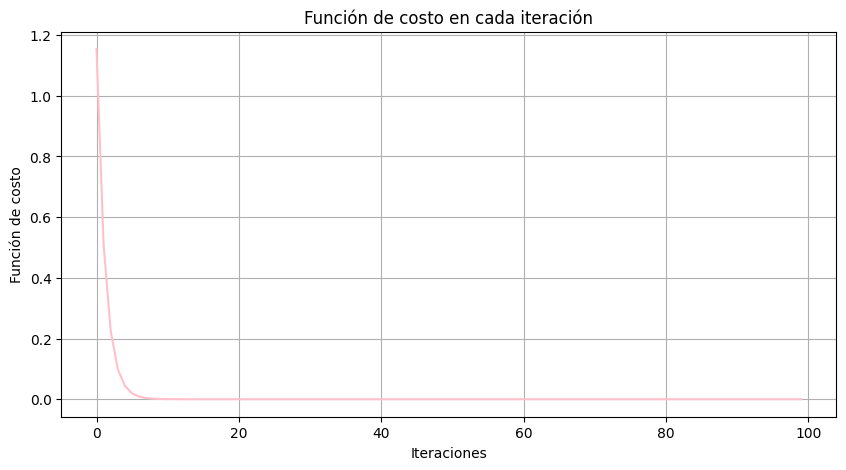

In [38]:
#@Gráfico de la función de costo en cada iteración
plt.figure(figsize=(10, 5))
plt.title("Función de costo en cada iteración")
plt.xlabel("Iteraciones")
plt.ylabel("Función de costo")
plt.plot(J, color = 'pink')
plt.grid()
plt.show()

In [39]:
#@title Parámetros theta encontrados para theta0, theta1 y theta2 respectivamente; como se puede ver corresponden con lo esperado
theta

array([[-4.81423749e-17],
       [ 2.10000000e+00],
       [-3.10000000e+00]])